### EAL-24f. EMPRESAS DEL SECTOR SERVICIOS QUE PROPORCIONARON FORMACIÓN A SUS TRABAJADORES, SEGÚN GRADO DE LIMITACIÓN A LA FORMACIÓN  QUE SUPUSIERON CIERTOS MOTIVOS

In [212]:
import pandas as pd
from pathlib import Path

carpeta_excels = Path.home() / "Escritorio" / "excels_EAL"
datos_combinados = []

for archivo in carpeta_excels.glob("*.xls*"):
    if archivo.name.startswith("~$"):
        continue
    try:
        if archivo.name == "Tablas_EAL_2023.xlsx":
            df = pd.read_excel(archivo, sheet_name="EAL-24", header=None,
                               engine="openpyxl" if archivo.suffix == ".xlsx" else None)
            df_recorte = pd.concat([df.iloc[98:103], df.iloc[104:107]], ignore_index=True)
        elif archivo.name in ["Tablas_EAL_2022.xlsx", "TABLAS_EAL_2021.xlsx"]:
            df = pd.read_excel(archivo, sheet_name="EAL-24", header=None,
                               engine="openpyxl" if archivo.suffix == ".xlsx" else None)
            df_recorte = df.iloc[92:101].copy()
        elif archivo.name == "TABLAS_EAL_2020.xls":
            df = pd.read_excel(archivo, sheet_name="EAL-24", header=None,
                               engine="openpyxl" if archivo.suffix == ".xlsx" else None)
            df_recorte = df.iloc[90:99].copy()
        elif archivo.name in ["TABLAS_EAL_2019.xlsx", "TABLAS_EAL_2019.xls"]:
            df = pd.read_excel(archivo, sheet_name="EAL-24", header=None,
                               engine="openpyxl" if archivo.suffix == ".xlsx" else None)
            df_recorte = df.iloc[91:100].copy()
        else:
            continue
        df_recorte["Fuente"] = archivo.stem
        datos_combinados.append(df_recorte)
        print(f"✅ Filas extraídas de {archivo.name}")
    except Exception as e:
        print(f"❌ Error con {archivo.name}: {e}")

# Combinar todos los DataFrames
df_final = pd.concat(datos_combinados, ignore_index=True)

# Mostrar una muestra
print("\n🧾 Muestra del DataFrame combinado:")
print(df_final.head())

✅ Filas extraídas de TABLAS_EAL_2019.xls
✅ Filas extraídas de TABLAS_EAL_2020.xls
✅ Filas extraídas de TABLAS_EAL_2021.xlsx
✅ Filas extraídas de Tablas_EAL_2022.xlsx
✅ Filas extraídas de Tablas_EAL_2023.xlsx

🧾 Muestra del DataFrame combinado:
                                                   0    1       2       3  \
0  El nivel de formación de los empleados era el ...  100  13.179  28.546   
1  La estrategia preferida de la empresa fue cont...  100  24.645  29.041   
2  Dificultad para evaluar la necesidades de form...  100  30.468  54.968   
3  La falta de cursos de formación adecuados en e...  100  25.501   46.19   
4           El alto coste de los cursos de formación  100  19.927  34.443   

        4       5           Fuente  
0  45.004  13.271  TABLAS_EAL_2019  
1  35.761  10.553  TABLAS_EAL_2019  
2  12.985   1.579  TABLAS_EAL_2019  
3  22.068    6.24  TABLAS_EAL_2019  
4  32.569  13.061  TABLAS_EAL_2019  


In [213]:
# Renombrar las columnas 0 a 5
df_final.rename(columns={
    0: 'motivo',
    1: 'total',
    2: 'nada',
    3: 'poco',
    4: 'bastante',
    5: 'mucho'
}, inplace=True)

# Mostrar

In [214]:
# 1. Cambiar el nombre de la última columna 'Fuente' por 'año'
df_final.rename(columns={df_final.columns[-1]: 'año'}, inplace=True)

# 2. Quedarte solo con los 4 últimos caracteres de cada registro en la columna 'año'
df_final['año'] = df_final['año'].astype(str).str[-4:]

# Mostrar el resultado
df_final.head()

,motivo,total,nada,poco,bastante,mucho,año
0,El nivel de formación de los empleados era el ...,100,13.179,28.546,45.004,13.271,2019
1,La estrategia preferida de la empresa fue cont...,100,24.645,29.041,35.761,10.553,2019
2,Dificultad para evaluar la necesidades de form...,100,30.468,54.968,12.985,1.579,2019
3,La falta de cursos de formación adecuados en e...,100,25.501,46.19,22.068,6.24,2019
4,El alto coste de los cursos de formación,100,19.927,34.443,32.569,13.061,2019


In [215]:
df_final['motivo'] = df_final['motivo'].str.strip()
df_final['motivo'] = df_final['motivo'].replace(
    "La empresa prefirió contratar a personal con la cualificación, habilidades y competencias necesarias",
    "La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas"
)

df_final

,motivo,total,nada,poco,bastante,mucho,año
0,El nivel de formación de los empleados era el ...,100,13.179,28.546,45.004,13.271,2019
1,La estrategia preferida de la empresa fue cont...,100,24.645,29.041,35.761,10.553,2019
2,Dificultad para evaluar la necesidades de form...,100,30.468,54.968,12.985,1.579,2019
3,La falta de cursos de formación adecuados en e...,100,25.501,46.19,22.068,6.24,2019
4,El alto coste de los cursos de formación,100,19.927,34.443,32.569,13.061,2019
5,El mayor esfuerzo realizado en años anteriores...,100,25.855,49.753,21.126,3.266,2019
6,La elevada carga de trabajo y el escaso tiempo...,100,10.804,26.158,42.043,20.995,2019
7,Dificultad para acceder a ayudas o subvencione...,100,19.13,36.743,28.97,15.156,2019
8,El nivel de formación de los empleados era el ...,100,10.567,12.991,61.078,15.364,2020
9,La estrategia preferida de la empresa fue cont...,100,34.293,20.911,35.687,9.109,2020


In [216]:

# Crear una columna 'numero de motivo' que enumere del 1 al 8 para cada motivo
motivos_unicos = df_final['motivo'].unique()
motivo_dict = {motivo: i+1 for i, motivo in enumerate(motivos_unicos)}
df_final['numero_motivo'] = df_final['motivo'].map(motivo_dict)

# Mostrar para comprobar
print(df_final[['motivo', 'numero_motivo']].drop_duplicates())

df_final

                                              motivo  numero_motivo
0  El nivel de formación de los empleados era el ...              1
1  La estrategia preferida de la empresa fue cont...              2
2  Dificultad para evaluar la necesidades de form...              3
3  La falta de cursos de formación adecuados en e...              4
4           El alto coste de los cursos de formación              5
5  El mayor esfuerzo realizado en años anteriores...              6
6  La elevada carga de trabajo y el escaso tiempo...              7
7  Dificultad para acceder a ayudas o subvencione...              8


,motivo,total,nada,poco,bastante,mucho,año,numero_motivo
0,El nivel de formación de los empleados era el ...,100,13.179,28.546,45.004,13.271,2019,1
1,La estrategia preferida de la empresa fue cont...,100,24.645,29.041,35.761,10.553,2019,2
2,Dificultad para evaluar la necesidades de form...,100,30.468,54.968,12.985,1.579,2019,3
3,La falta de cursos de formación adecuados en e...,100,25.501,46.19,22.068,6.24,2019,4
4,El alto coste de los cursos de formación,100,19.927,34.443,32.569,13.061,2019,5
5,El mayor esfuerzo realizado en años anteriores...,100,25.855,49.753,21.126,3.266,2019,6
6,La elevada carga de trabajo y el escaso tiempo...,100,10.804,26.158,42.043,20.995,2019,7
7,Dificultad para acceder a ayudas o subvencione...,100,19.13,36.743,28.97,15.156,2019,8
8,El nivel de formación de los empleados era el ...,100,10.567,12.991,61.078,15.364,2020,1
9,La estrategia preferida de la empresa fue cont...,100,34.293,20.911,35.687,9.109,2020,2


In [217]:
# Verifica si hay filas duplicadas en df_final
duplicados = df_final.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")

# Si quieres ver las filas duplicadas:
df_duplicados = df_final[df_final.duplicated(keep=False)]
print(df_duplicados)

Número de filas duplicadas: 0
Empty DataFrame
Columns: [motivo, total, nada, poco, bastante, mucho, año, numero_motivo]
Index: []


In [218]:
# Cambiar el tipo de dato de las columnas 'nada' y 'poco' a float
df_final['nada'] = pd.to_numeric(df_final['nada'], errors='coerce')
df_final['poco'] = pd.to_numeric(df_final['poco'], errors='coerce')
df_final['mucho'] = pd.to_numeric(df_final['mucho'], errors='coerce')
df_final['bastante'] = pd.to_numeric(df_final['bastante'], errors='coerce')

# Cambiar el tipo de dato de las columnas 'año' y 'total' a int
df_final['año'] = pd.to_numeric(df_final['año'], errors='coerce').astype('Int64')
df_final['total'] = pd.to_numeric(df_final['total'], errors='coerce').astype('Int64')

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   motivo         40 non-null     object 
 1   total          40 non-null     Int64  
 2   nada           40 non-null     float64
 3   poco           40 non-null     float64
 4   bastante       40 non-null     float64
 5   mucho          40 non-null     float64
 6   año            40 non-null     Int64  
 7   numero_motivo  40 non-null     int64  
dtypes: Int64(2), float64(4), int64(1), object(1)
memory usage: 2.7+ KB


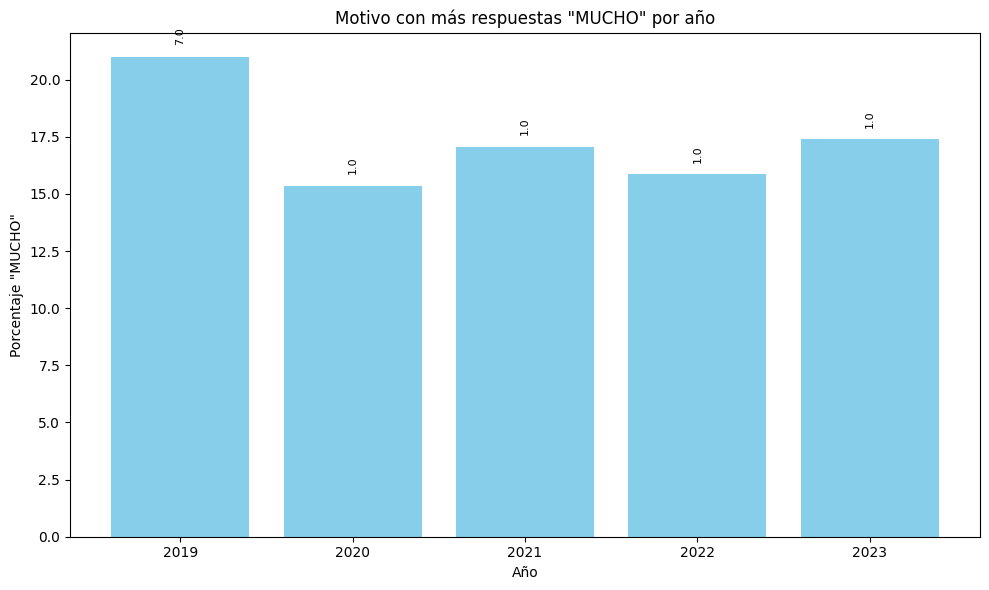

In [219]:
# Crear una lista para almacenar los resultados
resultados = []

for año in sorted(df_final['año'].unique()):
    df_año = df_final[df_final['año'] == año]
    motivo_top = df_año.loc[df_año['mucho'].idxmax()]
    resultados.append({
        'año': año,
        'numero_motivo': motivo_top['numero_motivo'],
        'mucho': motivo_top['mucho']
    })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(df_resultados['año'], df_resultados['mucho'], color='skyblue')
plt.xticks(df_resultados['año'])
plt.xlabel('Año')
plt.ylabel('Porcentaje "MUCHO"')
plt.title('Motivo con más respuestas "MUCHO" por año')
for i, row in df_resultados.iterrows():
    plt.text(row['año'], row['mucho']+0.5, row['numero_motivo'], rotation=90, va='bottom', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

### El nivel de formación de los empleados era el apropiado para las necesidades de la empresa

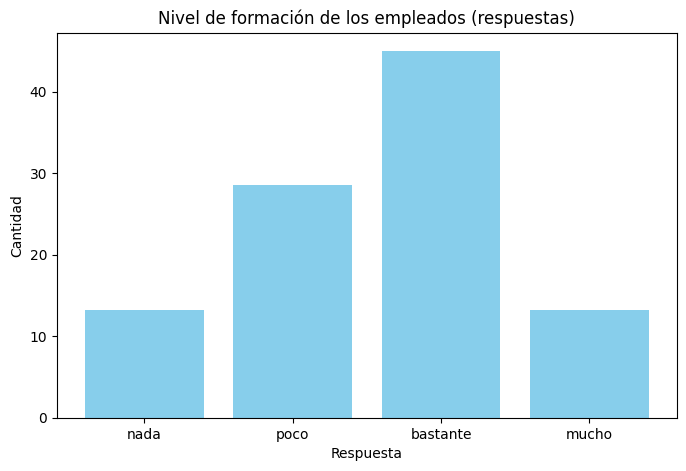

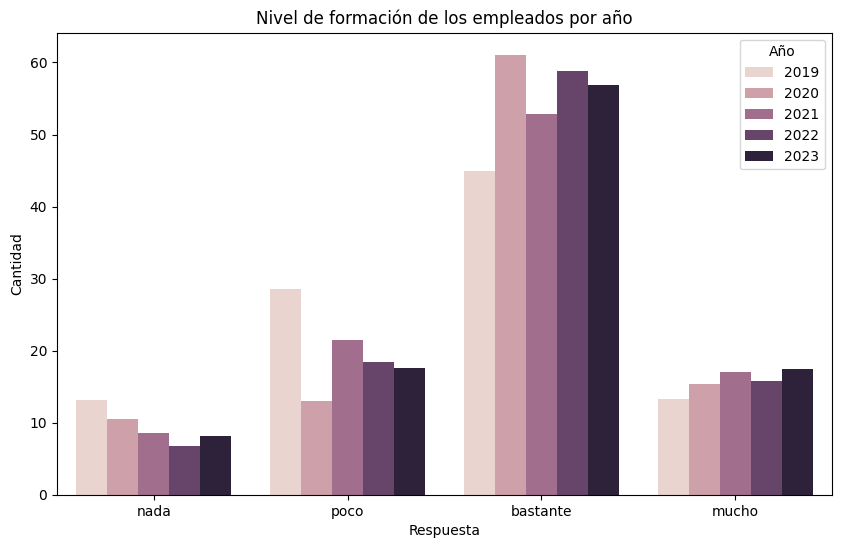

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Busca la(s) fila(s) que contienen exactamente ese texto en la columna 'motivo'
filtro = df_final['motivo'] == "El nivel de formación de los empleados era el apropiado para las necesidades de la empresa"
df_formacion_apropiada = df_final[filtro].copy()

# Si quieres resetear el índice:
df_formacion_apropiada.reset_index(drop=True, inplace=True)

# Mostrar el resultado
# print(df_formacion_apropiada)

# Selecciona solo las columnas de interés (ajusta si tienes más columnas)
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho']
valores = df_formacion_apropiada.loc[0, columnas_respuestas]

plt.figure(figsize=(8,5))
plt.bar(columnas_respuestas, valores, color='skyblue')
plt.title('Nivel de formación de los empleados (respuestas)')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

# Selecciona solo las columnas de interés y la columna Fuente
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho', 'año']
df_plot = df_formacion_apropiada[columnas_respuestas].copy()

# Convierte a formato largo para facilitar el gráfico
df_melt = df_plot.melt(id_vars='año', var_name='Respuesta', value_name='Cantidad')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Respuesta', y='Cantidad', hue='año')
plt.title('Nivel de formación de los empleados por año')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.legend(title='Año')
plt.show()



### La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas

                                              motivo  total    nada    poco  \
0  La estrategia preferida de la empresa fue cont...    100  24.645  29.041   
1  La estrategia preferida de la empresa fue cont...    100  34.293  20.911   
2  La estrategia preferida de la empresa fue cont...    100  22.605  28.778   
3  La estrategia preferida de la empresa fue cont...    100  17.780  27.601   
4  La estrategia preferida de la empresa fue cont...    100  20.622  25.614   

   bastante   mucho   año  numero_motivo  
0    35.761  10.553  2019              2  
1    35.687   9.109  2020              2  
2    36.853  11.764  2021              2  
3    43.014  11.605  2022              2  
4    41.983  11.781  2023              2  


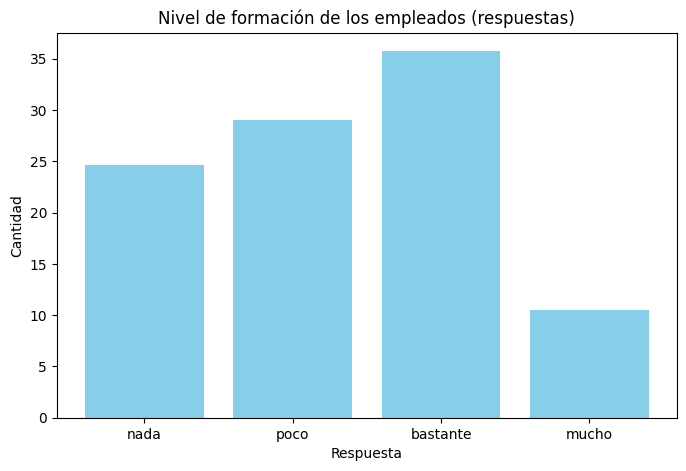

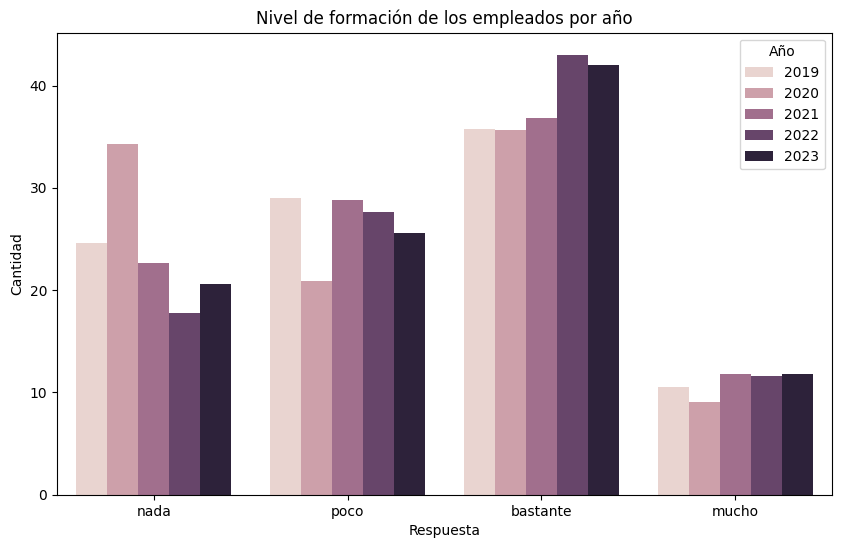

In [221]:
# Busca las filas que contienen exactamente cualquiera de los dos textos en la columna 'motivo'
filtro = df_final['motivo'] == "La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas"
df_estrategia_preferida = df_final[filtro].copy()

# Si quieres resetear el índice:
df_estrategia_preferida.reset_index(drop=True, inplace=True)

# Mostrar el resultado
print(df_estrategia_preferida)

# Selecciona solo las columnas de interés (ajusta si tienes más columnas)
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho']
valores = df_estrategia_preferida.loc[0, columnas_respuestas]

plt.figure(figsize=(8,5))
plt.bar(columnas_respuestas, valores, color='skyblue')
plt.title('Nivel de formación de los empleados (respuestas)')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

# Selecciona solo las columnas de interés y la columna Fuente
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho', 'año']
df_plot = df_estrategia_preferida[columnas_respuestas].copy()

# Convierte a formato largo para facilitar el gráfico
df_melt = df_plot.melt(id_vars='año', var_name='Respuesta', value_name='Cantidad')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Respuesta', y='Cantidad', hue='año')
plt.title('Nivel de formación de los empleados por año')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.legend(title='Año')
plt.show()


### Dificultad para evaluar la necesidades de formación de la empresa


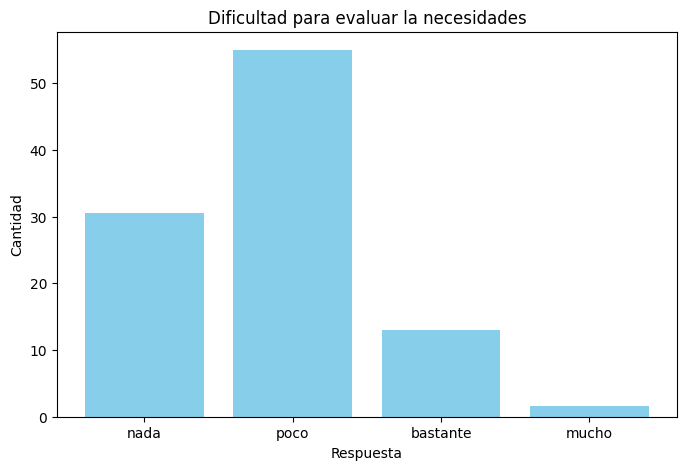

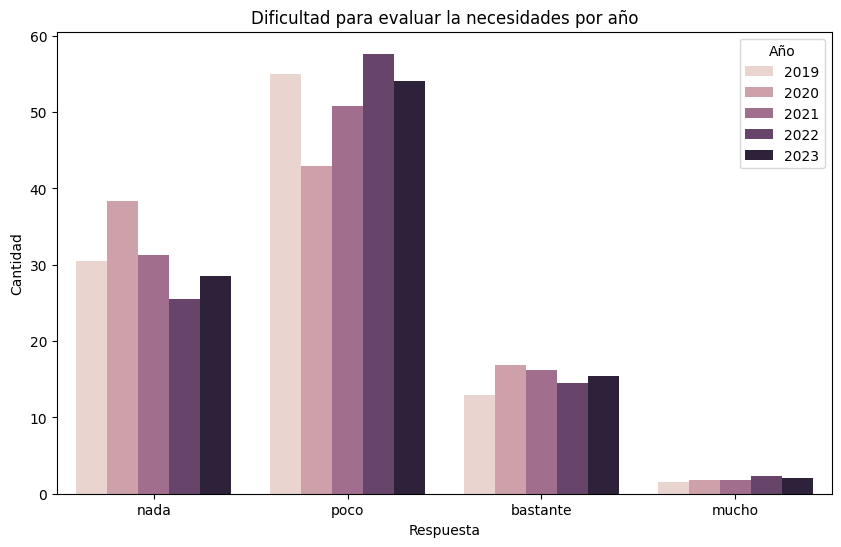

In [222]:
# Busca la(s) fila(s) que contienen exactamente ese texto en la columna 'motivo'
filtro = df_final['motivo'] == "Dificultad para evaluar la necesidades de formación de la empresa"
df_dificultad_evaluar = df_final[filtro].copy()

# Si quieres resetear el índice:
df_dificultad_evaluar.reset_index(drop=True, inplace=True)

# Mostrar el resultado
# print(df_dificultad_evaluar)

# Selecciona solo las columnas de interés (ajusta si tienes más columnas)
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho']
valores = df_dificultad_evaluar.loc[0, columnas_respuestas]

plt.figure(figsize=(8,5))
plt.bar(columnas_respuestas, valores, color='skyblue')
plt.title('Dificultad para evaluar la necesidades')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

# Selecciona solo las columnas de interés y la columna Fuente
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho', 'año']
df_plot = df_dificultad_evaluar[columnas_respuestas].copy()

# Convierte a formato largo para facilitar el gráfico
df_melt = df_plot.melt(id_vars='año', var_name='Respuesta', value_name='Cantidad')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Respuesta', y='Cantidad', hue='año')
plt.title('Dificultad para evaluar la necesidades por año')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.legend(title='Año')
plt.show()



### La falta de cursos de formación adecuados en el mercado


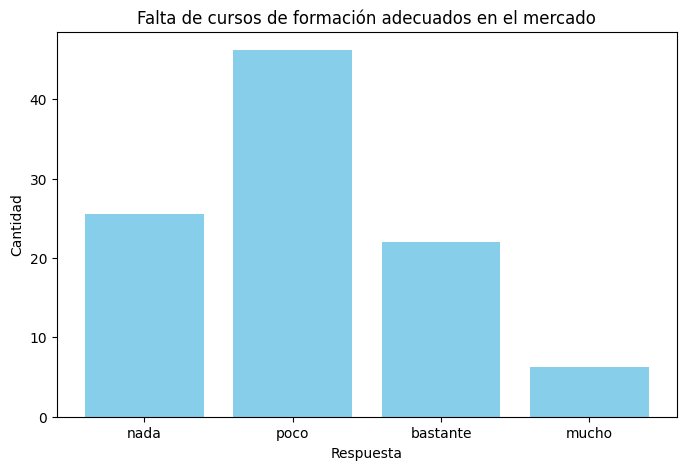

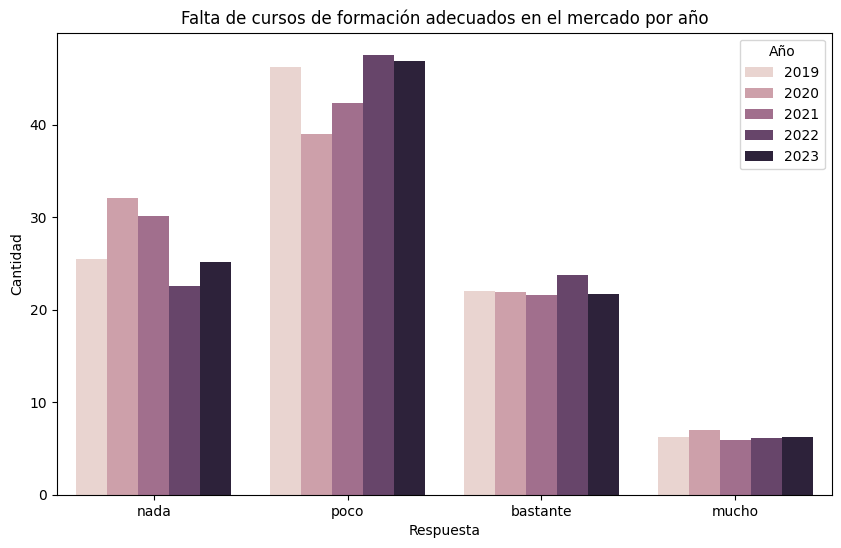

In [223]:
# Busca la(s) fila(s) que contienen exactamente ese texto en la columna 'motivo'
filtro = df_final['motivo'] == "La falta de cursos de formación adecuados en el mercado"
df_falta_cursos = df_final[filtro].copy()

# Si quieres resetear el índice:
df_falta_cursos.reset_index(drop=True, inplace=True)

# Mostrar el resultado
# print(df_falta_cursos)

# Selecciona solo las columnas de interés (ajusta si tienes más columnas)
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho']
valores = df_falta_cursos.loc[0, columnas_respuestas]

plt.figure(figsize=(8,5))
plt.bar(columnas_respuestas, valores, color='skyblue')
plt.title('Falta de cursos de formación adecuados en el mercado')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

# Selecciona solo las columnas de interés y la columna Fuente
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho', 'año']
df_plot = df_falta_cursos[columnas_respuestas].copy()

# Convierte a formato largo para facilitar el gráfico
df_melt = df_plot.melt(id_vars='año', var_name='Respuesta', value_name='Cantidad')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Respuesta', y='Cantidad', hue='año')
plt.title('Falta de cursos de formación adecuados en el mercado por año')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.legend(title='Año')
plt.show()



### El alto coste de los cursos de formación

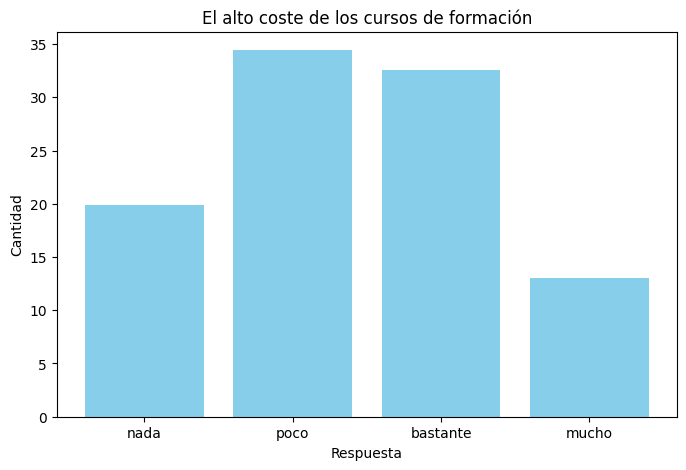

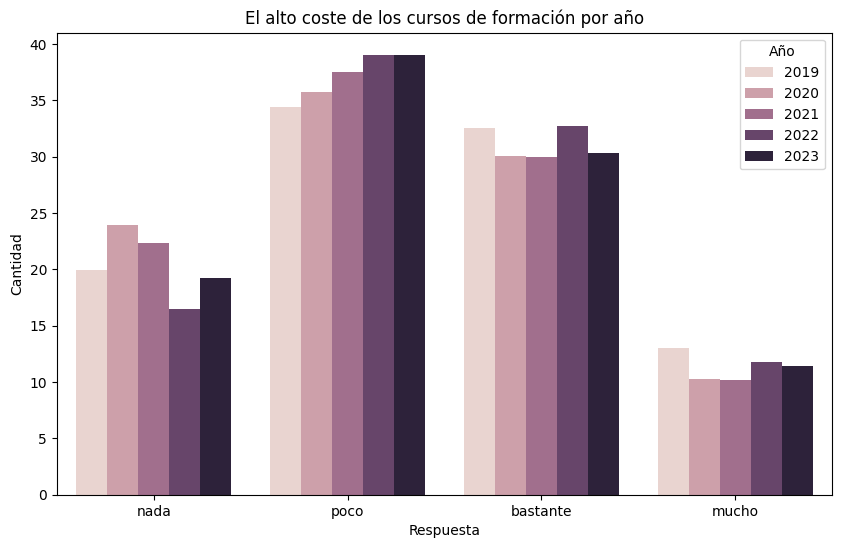

In [224]:
# Busca la(s) fila(s) que contienen exactamente ese texto en la columna 'motivo'
filtro = df_final['motivo'] == "El alto coste de los cursos de formación"
df_alto_coste = df_final[filtro].copy()

# Si quieres resetear el índice:
df_alto_coste.reset_index(drop=True, inplace=True)

# Mostrar el resultado
# print(df_alto_coste)

# Selecciona solo las columnas de interés (ajusta si tienes más columnas)
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho']
valores = df_alto_coste.loc[0, columnas_respuestas]

plt.figure(figsize=(8,5))
plt.bar(columnas_respuestas, valores, color='skyblue')
plt.title('El alto coste de los cursos de formación')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

# Selecciona solo las columnas de interés y la columna Fuente
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho', 'año']
df_plot = df_alto_coste[columnas_respuestas].copy()

# Convierte a formato largo para facilitar el gráfico
df_melt = df_plot.melt(id_vars='año', var_name='Respuesta', value_name='Cantidad')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Respuesta', y='Cantidad', hue='año')
plt.title('El alto coste de los cursos de formación por año')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.legend(title='Año')
plt.show()



### El mayor esfuerzo realizado en años anteriores para ofrecer formación a sus trabajadores


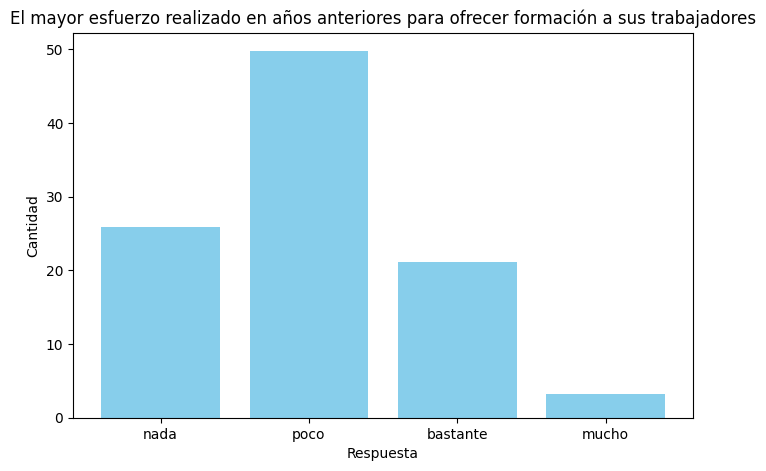

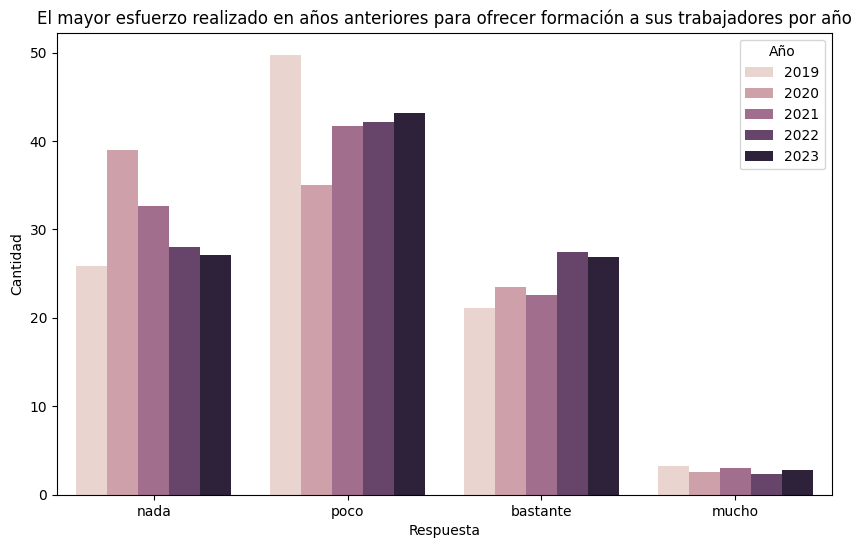

In [225]:
# Busca la(s) fila(s) que contienen exactamente ese texto en la columna 'motivo'
filtro = df_final['motivo'] == "El mayor esfuerzo realizado en años anteriores para ofrecer formación a sus trabajadores"
df_esfuerzo_realizado = df_final[filtro].copy()

# Si quieres resetear el índice:
df_esfuerzo_realizado.reset_index(drop=True, inplace=True)

# Mostrar el resultado
# print(df_esfuerzo_realizado)

# Selecciona solo las columnas de interés (ajusta si tienes más columnas)
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho']
valores = df_esfuerzo_realizado.loc[0, columnas_respuestas]

plt.figure(figsize=(8,5))
plt.bar(columnas_respuestas, valores, color='skyblue')
plt.title('El mayor esfuerzo realizado en años anteriores para ofrecer formación a sus trabajadores')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

# Selecciona solo las columnas de interés y la columna Fuente
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho', 'año']
df_plot = df_esfuerzo_realizado[columnas_respuestas].copy()

# Convierte a formato largo para facilitar el gráfico
df_melt = df_plot.melt(id_vars='año', var_name='Respuesta', value_name='Cantidad')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Respuesta', y='Cantidad', hue='año')
plt.title('El mayor esfuerzo realizado en años anteriores para ofrecer formación a sus trabajadores por año')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.legend(title='Año')
plt.show()



### La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa


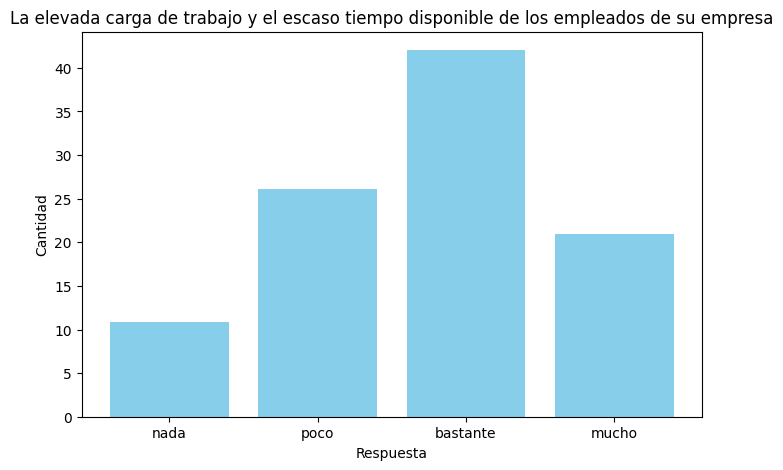

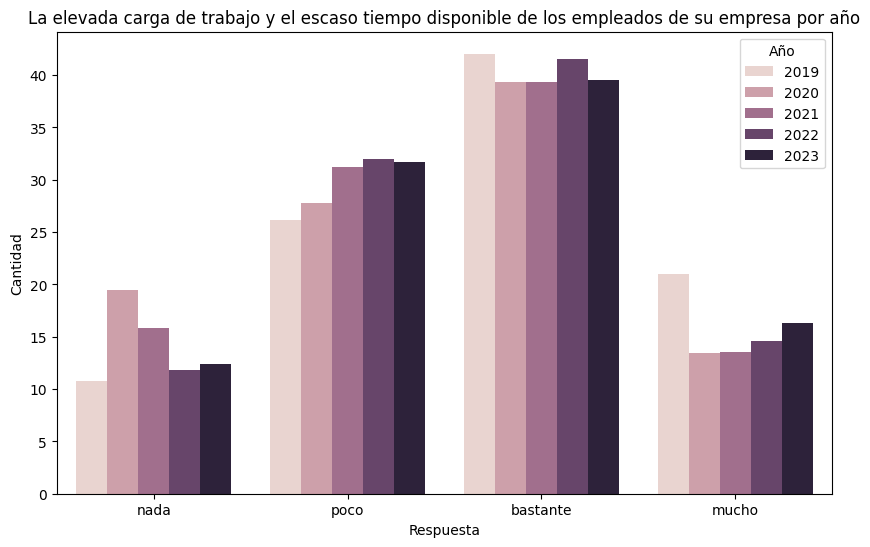

In [226]:
# Busca la(s) fila(s) que contienen exactamente ese texto en la columna 'motivo'
filtro = df_final['motivo'] == "La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa"
df_elevada_carga = df_final[filtro].copy()

# Si quieres resetear el índice:
df_elevada_carga.reset_index(drop=True, inplace=True)

# Mostrar el resultado
# print(df_elevada_carga)

# Selecciona solo las columnas de interés (ajusta si tienes más columnas)
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho']
valores = df_elevada_carga.loc[0, columnas_respuestas]

plt.figure(figsize=(8,5))
plt.bar(columnas_respuestas, valores, color='skyblue')
plt.title('La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

# Selecciona solo las columnas de interés y la columna Fuente
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho', 'año']
df_plot = df_elevada_carga[columnas_respuestas].copy()

# Convierte a formato largo para facilitar el gráfico
df_melt = df_plot.melt(id_vars='año', var_name='Respuesta', value_name='Cantidad')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Respuesta', y='Cantidad', hue='año')
plt.title('La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa por año')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.legend(title='Año')
plt.show()



### Dificultad para acceder a ayudas o subvenciones públicas


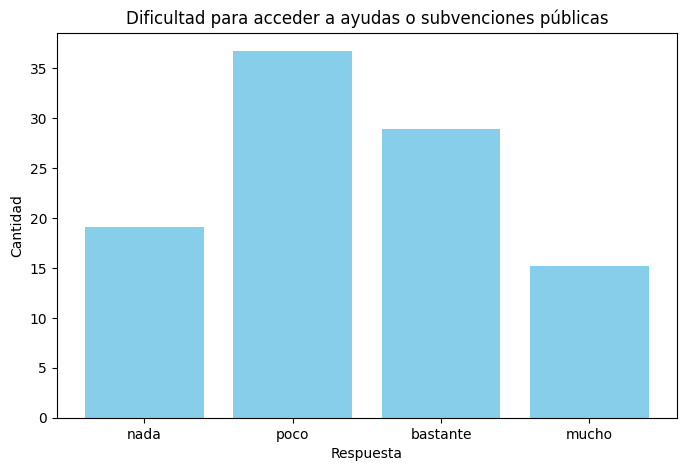

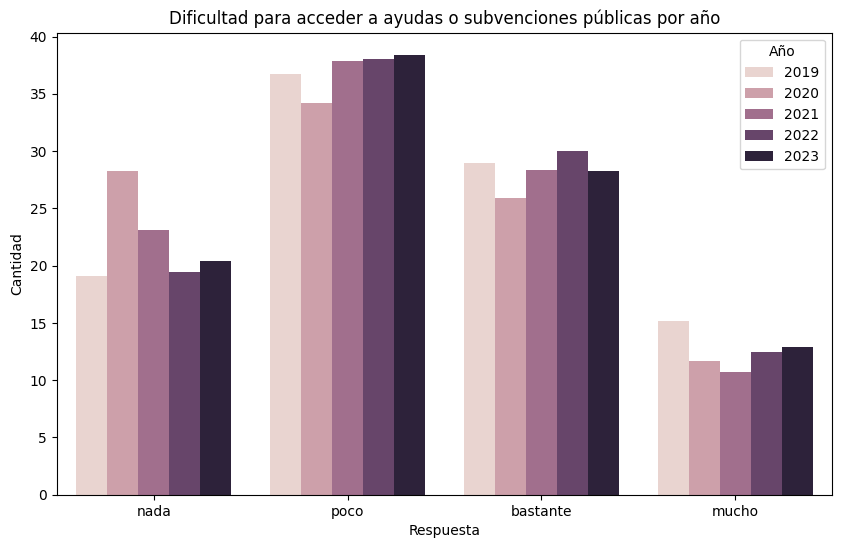

In [227]:
# Busca la(s) fila(s) que contienen exactamente ese texto en la columna 'motivo'
filtro = df_final['motivo'] == "Dificultad para acceder a ayudas o subvenciones públicas"
df_acceder_ayudas = df_final[filtro].copy()

# Si quieres resetear el índice:
df_acceder_ayudas.reset_index(drop=True, inplace=True)

# Mostrar el resultado
# print(df_acceder_ayudas)

# Selecciona solo las columnas de interés (ajusta si tienes más columnas)
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho']
valores = df_acceder_ayudas.loc[0, columnas_respuestas]

plt.figure(figsize=(8,5))
plt.bar(columnas_respuestas, valores, color='skyblue')
plt.title('Dificultad para acceder a ayudas o subvenciones públicas')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.show()

# Selecciona solo las columnas de interés y la columna Fuente
columnas_respuestas = ['nada', 'poco', 'bastante', 'mucho', 'año']
df_plot = df_acceder_ayudas[columnas_respuestas].copy()

# Convierte a formato largo para facilitar el gráfico
df_melt = df_plot.melt(id_vars='año', var_name='Respuesta', value_name='Cantidad')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Respuesta', y='Cantidad', hue='año')
plt.title('Dificultad para acceder a ayudas o subvenciones públicas por año')
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.legend(title='Año')
plt.show()



In [228]:
print(df_final.columns)

Index(['motivo', 'total', 'nada', 'poco', 'bastante', 'mucho', 'año',
       'numero_motivo'],
      dtype='object')


In [229]:
# Para cada año, ¿qué motivo tiene más respuestas "mucho"?
for año in sorted(df_final['año'].unique()):
    df_año = df_final[df_final['año'] == año]
    motivo_top = df_año.loc[df_año['mucho'].idxmax()]
    print(f"Año {año}: Barrera más común (MUCHO): {motivo_top['numero_motivo']} ({motivo_top['mucho']})")

Año 2019: Barrera más común (MUCHO): 7 (20.995)
Año 2020: Barrera más común (MUCHO): 1 (15.364)
Año 2021: Barrera más común (MUCHO): 1 (17.067)
Año 2022: Barrera más común (MUCHO): 1 (15.853)
Año 2023: Barrera más común (MUCHO): 1 (17.398)


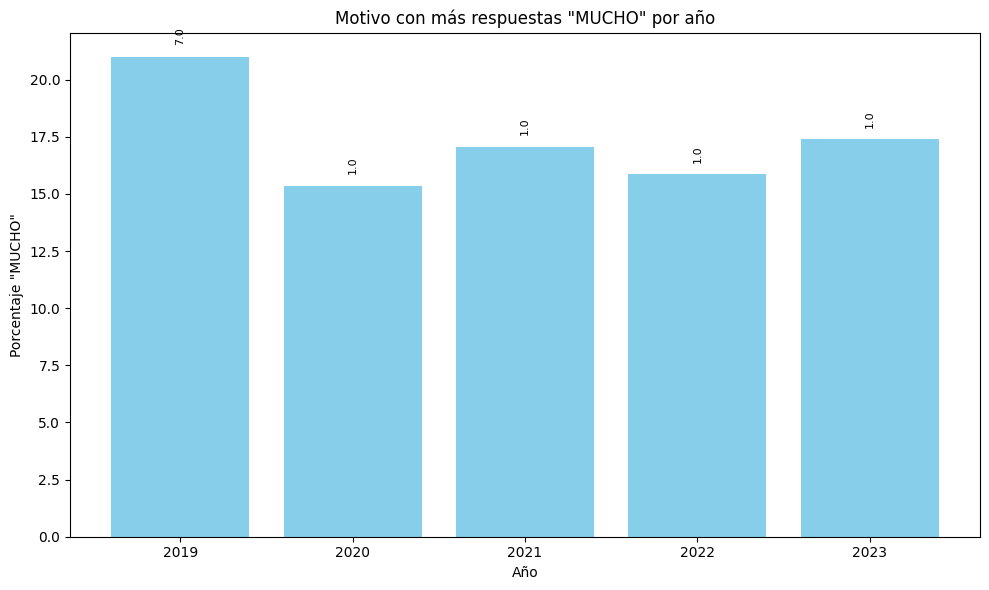

In [230]:
# Crear una lista para almacenar los resultados
resultados = []

for año in sorted(df_final['año'].unique()):
    df_año = df_final[df_final['año'] == año]
    motivo_top = df_año.loc[df_año['mucho'].idxmax()]
    resultados.append({
        'año': año,
        'numero_motivo': motivo_top['numero_motivo'],
        'mucho': motivo_top['mucho']
    })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(df_resultados['año'], df_resultados['mucho'], color='skyblue')
plt.xticks(df_resultados['año'])
plt.xlabel('Año')
plt.ylabel('Porcentaje "MUCHO"')
plt.title('Motivo con más respuestas "MUCHO" por año')
for i, row in df_resultados.iterrows():
    plt.text(row['año'], row['mucho']+0.5, row['numero_motivo'], rotation=90, va='bottom', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

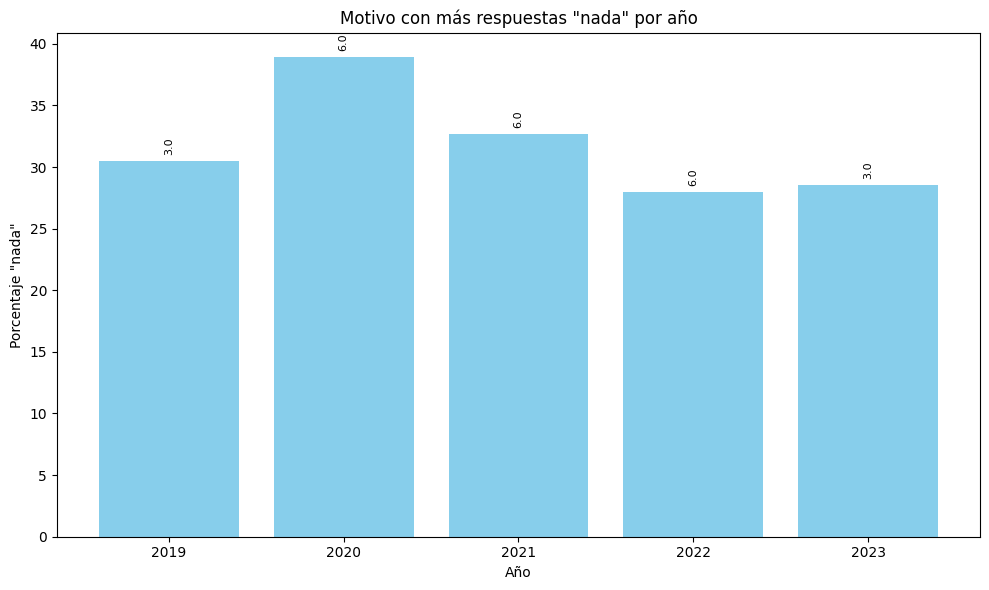

In [231]:
# Crear una lista para almacenar los resultados
resultados = []

for año in sorted(df_final['año'].unique()):
    df_año = df_final[df_final['año'] == año]
    motivo_top = df_año.loc[df_año['nada'].idxmax()]
    resultados.append({
        'año': año,
        'numero_motivo': motivo_top['numero_motivo'],
        'nada': motivo_top['nada']
    })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(df_resultados['año'], df_resultados['nada'], color='skyblue')
plt.xticks(df_resultados['año'])
plt.xlabel('Año')
plt.ylabel('Porcentaje "nada"')
plt.title('Motivo con más respuestas "nada" por año')
for i, row in df_resultados.iterrows():
    plt.text(row['año'], row['nada']+0.5, row['numero_motivo'], rotation=90, va='bottom', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

### Formato largo

In [246]:
# Organizar df_final en formato largo con las columnas solicitadas

columnas_largas = ['año', 'motivo', 'numero_motivo', 'nada', 'poco', 'bastante', 'mucho']

# Convierte a formato largo (melt)
df_largo = pd.melt(
    df_final[columnas_largas],
    id_vars=['año', 'motivo', 'numero_motivo'],
    value_vars=['nada', 'poco', 'bastante', 'mucho'],
    var_name='nivel',
    value_name='porcentaje'
)

# Opcional: ordena el DataFrame
df_largo = df_largo.sort_values(['año', 'numero_motivo', 'nivel'])

df_largo.head

<bound method NDFrame.head of       año                                             motivo  numero_motivo  \
80   2019  El nivel de formación de los empleados era el ...              1   
120  2019  El nivel de formación de los empleados era el ...              1   
0    2019  El nivel de formación de los empleados era el ...              1   
40   2019  El nivel de formación de los empleados era el ...              1   
81   2019  La estrategia preferida de la empresa fue cont...              2   
..    ...                                                ...            ...   
78   2023  La elevada carga de trabajo y el escaso tiempo...              7   
119  2023  Dificultad para acceder a ayudas o subvencione...              8   
159  2023  Dificultad para acceder a ayudas o subvencione...              8   
39   2023  Dificultad para acceder a ayudas o subvencione...              8   
79   2023  Dificultad para acceder a ayudas o subvencione...              8   

        nivel  porcen

In [241]:
df_largo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 80 to 79
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   año            160 non-null    Int64  
 1   motivo         160 non-null    object 
 2   numero_motivo  160 non-null    int64  
 3   nivel          160 non-null    object 
 4   porcentaje     160 non-null    float64
dtypes: Int64(1), float64(1), int64(1), object(2)
memory usage: 7.7+ KB


### Visualización de tendencias por motivo
permitirá ver si alguna barrera está creciendo o disminuyendo en importancia con el tiempo.

* evolución anual para cada motivo, especialmente en las categorías “MUCHO” y “BASTANTE”, ya que reflejan mayor intensidad del obstáculo.

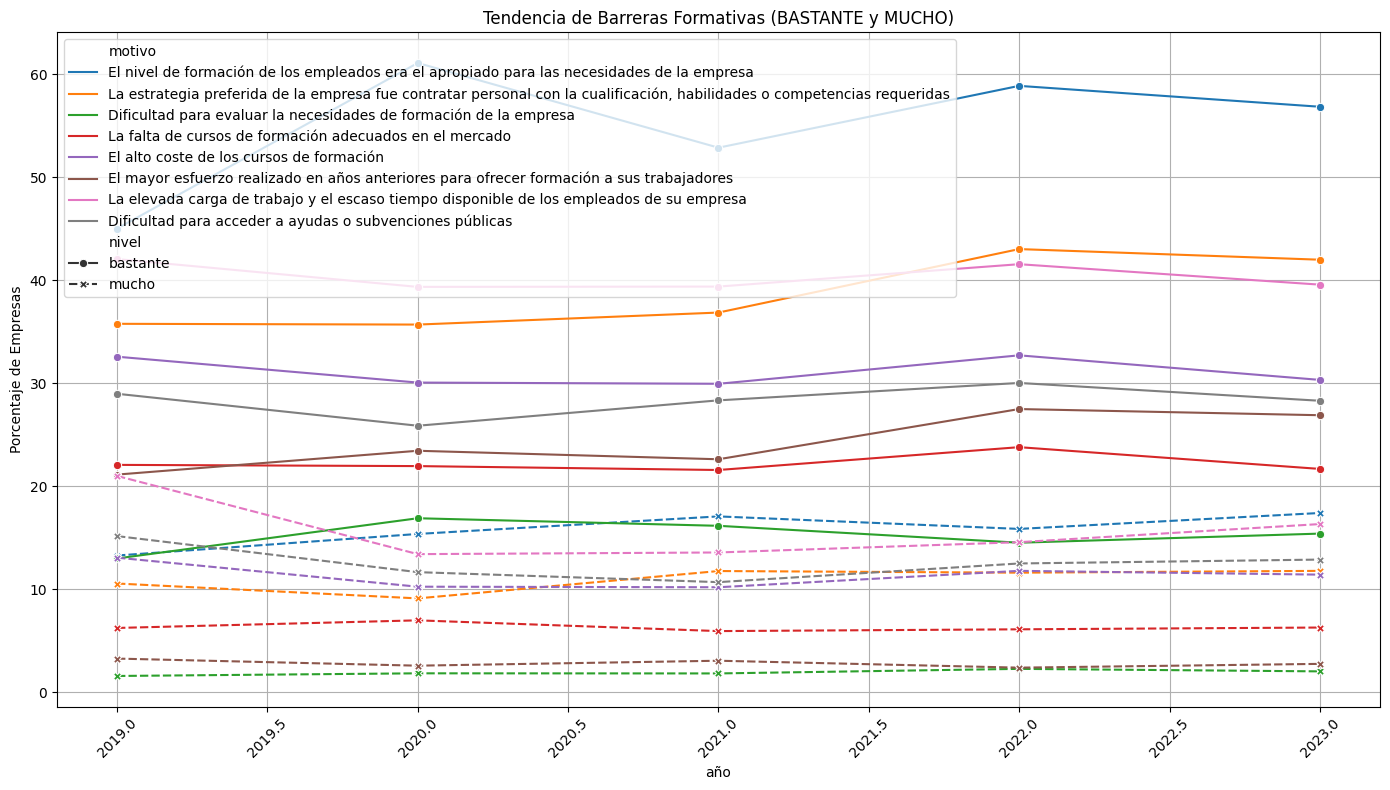

In [245]:
# Filtrar las categorías más relevantes
df_filtrado = df_largo[df_largo['nivel'].isin(['mucho', 'bastante'])]

# Gráfico por motivo
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_filtrado, x='año', y='porcentaje', hue='motivo', style='nivel', markers=True)
plt.title('Tendencia de Barreras Formativas (BASTANTE y MUCHO)')
plt.ylabel('Porcentaje de Empresas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Análisis de las barreras más comunes
visión general de qué barreras son las más comunes en promedio en esos 5 años.

* Calcula el promedio del porcentaje de respuestas "MUCHO" + "BASTANTE" por motivo y año.
* Ordena los motivos por esos promedios para identificar las más persistentes.

In [235]:
df_top = df_filtrado.groupby(['motivo', 'año'])['porcentaje'].sum().reset_index()
df_top_avg = df_top.groupby('motivo')['porcentaje'].mean().sort_values(ascending=False)
print(df_top_avg)


motivo
El nivel de formación de los empleados era el apropiado para las necesidades de la empresa                                  70.7156
La elevada carga de trabajo y el escaso tiempo disponible de los empleados de su empresa                                    56.1452
La estrategia preferida de la empresa fue contratar personal con la cualificación, habilidades o competencias requeridas    49.6220
El alto coste de los cursos de formación                                                                                    42.4556
Dificultad para acceder a ayudas o subvenciones públicas                                                                    40.8708
La falta de cursos de formación adecuados en el mercado                                                                     28.5184
El mayor esfuerzo realizado en años anteriores para ofrecer formación a sus trabajadores                                    27.1186
Dificultad para evaluar la necesidades de formación de la empresa    

### Análisis de tendencia (estadístico)
Para detectar tendencias significativas en el tiempo:

In [236]:
from scipy.stats import linregress

tendencias = []
for motivo in df_filtrado['motivo'].unique():
    sub = df_filtrado[(df_filtrado['motivo'] == motivo) & (df_filtrado['nivel'] == 'mucho')]
    res = linregress(sub['año'], sub['porcentaje'])
    tendencias.append((motivo, res.slope, res.pvalue))

tendencias_df = pd.DataFrame(tendencias, columns=['motivo', 'pendiente', 'p-valor'])
tendencias_df = tendencias_df.sort_values(by='pendiente', ascending=False)
print(tendencias_df)


                                              motivo  pendiente   p-valor
0  El nivel de formación de los empleados era el ...     0.8743  0.072646
1  La estrategia preferida de la empresa fue cont...     0.4952  0.208046
2  Dificultad para evaluar la necesidades de form...     0.1324  0.092459
3  La falta de cursos de formación adecuados en e...    -0.0791  0.606648
5  El mayor esfuerzo realizado en años anteriores...    -0.1218  0.346090
4           El alto coste de los cursos de formación    -0.1753  0.706668
7  Dificultad para acceder a ayudas o subvencione...    -0.3717  0.561563
6  La elevada carga de trabajo y el escaso tiempo...    -0.8184  0.490978
